<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Lesson_2_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# insallation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR) ## again to prevent too many warning

In [2]:
tf.__version__

'2.3.0'

In [3]:
# load data
from sklearn.datasets import load_breast_cancer

In [6]:
df = load_breast_cancer()

In [19]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
df.data.shape

(569, 30)

In [27]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.data)

In [21]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df.target, test_size=0.33, random_state=42)

In [32]:
len(X_test), len(X_train)

(188, 381)

In [34]:
D, N = X_train.shape

In [49]:
D , N

(381, 30)

In [55]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [59]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,N)),
        #tf.keras.layers.Dense(100, activation = 'sigmoid'),
        tf.keras.layers.Dense(1, activation = 'sigmoid'),                              
        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 381, 1)            31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam', loss='binary_crossentropy', 
              metrics = 'accuracy')

In [69]:
EPOCHS = 100
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), 
          epochs=EPOCHS)

Epoch 1/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9869 - val_loss: 0.0572 - val_accuracy: 0.9840
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9869 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9869 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9869 - val_loss: 0.0570 - val_accuracy: 0.9840
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9869 - val_loss: 0.0569 - val_accuracy: 0.9840
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9869 - val_loss: 0.0569 - val_accuracy: 0.9840
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9869 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 8/100
1

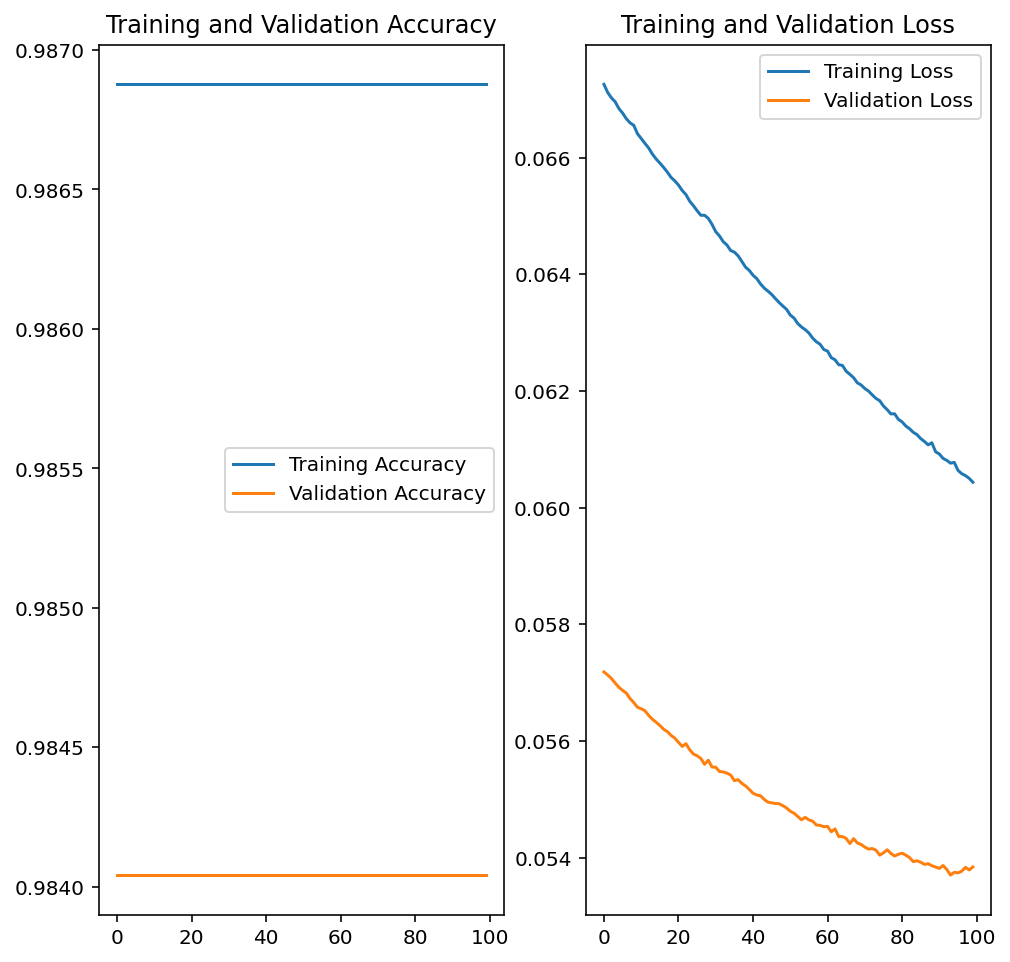

In [79]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
import pandas as pd


In [104]:
pd.DataFrame({'model':model.predict(X_train).reshape(381,), 'actual':y_train})

,model,actual
0,1.119438e-02,0
1,9.992179e-01,1
2,1.971670e-07,0
3,9.939536e-01,1
4,9.988496e-01,1
...,...,...
376,1.000000e+00,1
377,8.872631e-01,1
378,9.999204e-01,1
379,2.552986e-02,0


### End of Document
